## Read Data

In [13]:
# Import Libraries and Data
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
import scorecardpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import re
from datetime import datetime

warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("source data/twitter_human_bots_dataset.csv", index_col=0)
df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


# Data Cleaning

## Handling missing values

description, lang, location, profile_image_url and profile_background_image_url have missing values.

### Missing descriptions

As there are many bot accounts with missing description, this is a significant value, we would add a check for missing descriptions.

In [14]:
df.loc[df['description'].isnull(), 'account_type'].value_counts()
df['is_description_na'] = df['description'].isna().astype(int)
df.loc[df['description'].isnull(), 'description'] = ''

### Missing lang

As there are many bot accounts with missing lang, this is a significant value, we would add a check for missing langs.

In [15]:
df.loc[df['lang'].isnull(), 'account_type'].value_counts()
df['is_lang_na'] = df['lang'].isna().astype(int)
df.loc[df['lang'].isnull(), 'lang'] = ''

### Missing location

We set the missing locations to 'unknown' as that is already a value in the feature.

In [16]:
df.loc[df['location'].isnull(), 'account_type'].value_counts()
df.loc[df['location'].isnull(), 'location'] = 'unknown'

### Missing profile_background_image_url

We set the missing profile_background_image_url to the default url.

In [17]:
df.loc[df['profile_background_image_url'].isnull(), 'account_type'].value_counts()
default_background = df['profile_background_image_url'].mode()[0]
df.loc[df['profile_background_image_url'].isnull(), 'profile_background_image_url'] = default_background

### Missing profile_image_url

We set the missing profile_image_url to the default url.

In [18]:
df.loc[df['profile_image_url'].isnull(), 'account_type'].value_counts()
default_image = df['profile_image_url'].mode()[0]
df.loc[df['profile_image_url'].isnull(), 'profile_image_url'] = default_image

In [19]:
print(df.isnull().sum())    

created_at                      0
default_profile                 0
default_profile_image           0
description                     0
favourites_count                0
followers_count                 0
friends_count                   0
geo_enabled                     0
id                              0
lang                            0
location                        0
profile_background_image_url    0
profile_image_url               0
screen_name                     0
statuses_count                  0
verified                        0
average_tweets_per_day          0
account_age_days                0
account_type                    0
is_description_na               0
is_lang_na                      0
dtype: int64


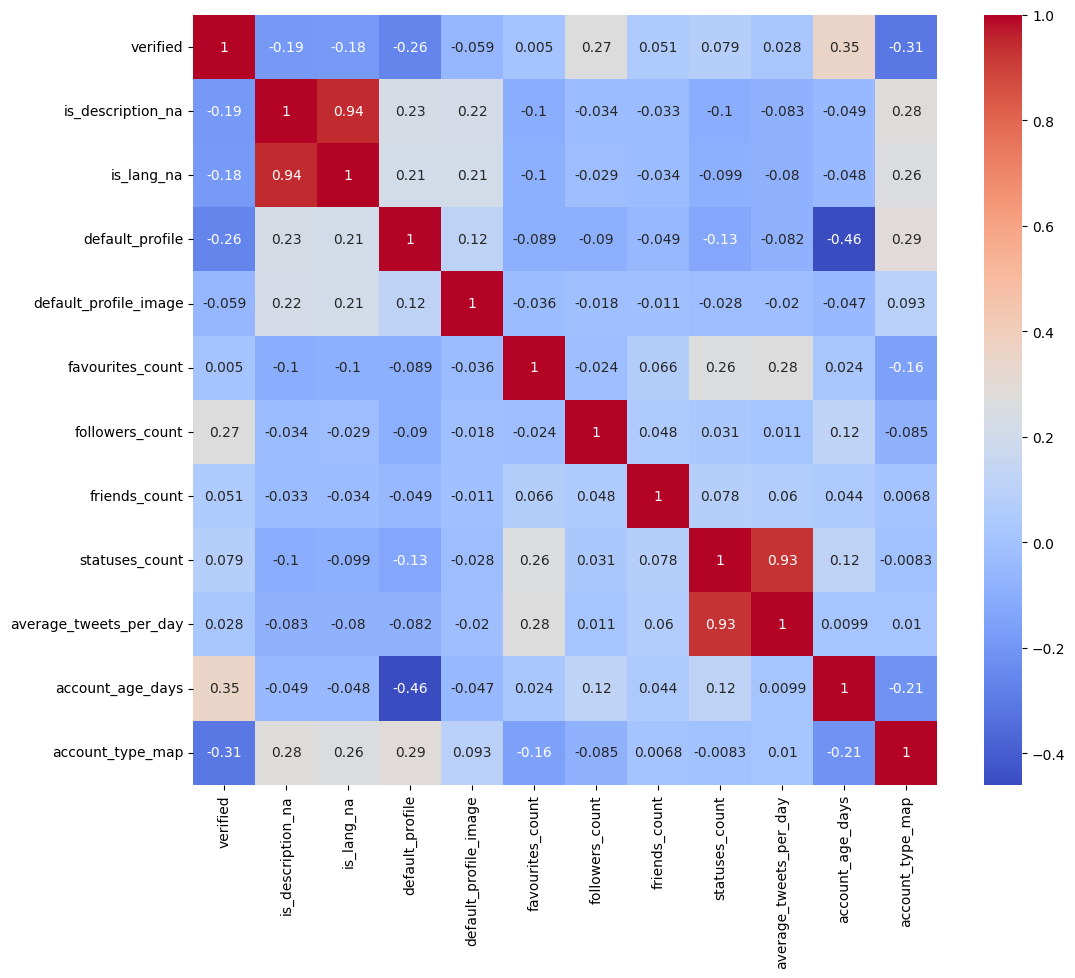

In [20]:

# Select numerical columns
numerical_columns = ['verified', 'is_description_na', 'is_lang_na', 'default_profile', 
                     'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 
                     'statuses_count', 'average_tweets_per_day', 'account_age_days', 'account_type_map']

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()
# Set the figure size
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

# Since statuses_count and average_tweets_per_day are highly correlated, we have to drop one of them
# As average_tweets_per_day has a higher correlation with the target variable, we will drop statuses_count

# Feature Engineering
* Feature Creation
* Feature Reduction (using Weight of Evidence(woe) check for feature importance, Correlation)
* Run feature selection using tree base algo (random forest or smth)

### Encoding boolean features into 0 and 1s

In [ ]:
df['account_type_map'] = df['account_type'].map({'bot': 1, 'human': 0})

df['default_profile'] = df['default_profile'].astype(int)
df['default_profile_image'] = df['default_profile_image'].astype(int)
df['verified'] = df['verified'].astype(int)
df['geo_enabled'] = df['geo_enabled'].astype(int)


### Encoding common values for lang and location

In [23]:
df['is_lang_en'] = df['lang'].map({'en': 1}).fillna(0)
print(df['is_lang_en'].value_counts())  

is_lang_en
1.0    21450
0.0    15988
Name: count, dtype: int64
is_lang_en
1.0    21450
0.0    15988
Name: count, dtype: int64


In [24]:
df['is_location_unknown'] = df['location'].map({'unknown': 1}).fillna(0)
print(df['is_location_unknown'].value_counts())

is_location_unknown
0.0    24411
1.0    13027
Name: count, dtype: int64


#### Handling non alphabet location

1 represents locations that do not contain any alphabets.

In [35]:
df['is_location_nonalphabet'] = df['location'].apply(lambda x: 0 if re.search('[^a-zA-Z]', str(x)) else 1)
print(df['is_location_nonalphabet'].value_counts())

is_location_nonalphabet
0    19360
1    18078
Name: count, dtype: int64


## Transformed Features to consider:
* Sentiment analysis for description
* Number of mentions in description to other bot accounts
* Length of description
* Ratio Followers_count to friends count
* Ratio of Followers_count to tweets per day
* Ratio of friends to tweets per day
* Ratio of tweets since account created
* Time when account was created (Past midnight of timezone, obtained from location)
* Standard deviation of avg tweets from avg tweets of bots

<b>Total Features: 18 (provided) + 9 (created)</b>

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])

current_time = datetime.now()
df['account_age_days'] = (current_time - df['created_at']).dt.days

df['creation_hour'] = df['created_at'].dt.hour

df['creation_day_of_week'] = df['created_at'].dt.dayofweek

df['creation_month'] = df['created_at'].dt.month

df['creation_year'] = df['created_at'].dt.year

df['is_weekend'] = df['created_at'].dt.dayofweek >= 5

df['creation_quarter'] = df['created_at'].dt.quarter

def part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['part_of_day'] = df['creation_hour'].apply(part_of_day)

df['creation_week_of_year'] = df['created_at'].dt.isocalendar().week

df['is_beginning_of_month'] = df['created_at'].dt.day <= 5
df['is_end_of_month'] = df['created_at'].dt.day >= 26

tmp_lst = ['account_age_days','creation_hour','creation_day_of_week','creation_month','creation_year','creation_quarter']
tmp_lst_cat = ['is_weekend','part_of_day','is_beginning_of_month','is_end_of_month']
df[tmp_lst].describe()
df[tmp_lst_cat].value_counts()


2006      13
2007     354
2008    1447
2009    7598
2010    4668
2011    5550
2012    4594
2013    3013
2014    2476
2015    2140
2016    2276
2017    2445
2018     835
2019      29
Name: year, dtype: int64

In [ ]:

humans_mean = df[df['account_type'] == 'human']['average_tweets_per_day'].mean()
humans_std = df[df['account_type'] == 'human']['average_tweets_per_day'].std()

df['deviation_from_humans'] = df['average_tweets_per_day'].apply(
    lambda x: (x - humans_mean) / humans_std
)

df['deviation_from_humans'].describe()

Length of Description Feature

In [ ]:
df['description_length'] = df['description'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
print(df['description_length'].describe())
print(df['description_length'].isna().sum())

count    37438.000000
mean        66.878092
std         55.092550
min          0.000000
25%         14.000000
50%         58.000000
75%        118.000000
max        190.000000
Name: description_length, dtype: float64
0


Ratio of Followers_count to tweets per day

In [ ]:
df['followers_to_friends_ratio'] = df['followers_count'] / df['friends_count']
print(df['followers_to_friends_ratio'].describe())
print(df['followers_to_friends_ratio'].value_counts())
print(f"\nNumber of NA: {df['followers_to_friends_ratio'].isna().sum()}")

count    3.640400e+04
mean              inf
std               NaN
min      0.000000e+00
25%      5.224889e-01
50%      1.708792e+00
75%      1.042999e+03
max               inf
Name: followers_to_friends_ratio, dtype: float64
followers_to_friends_ratio
inf            5376
0.000000        221
1.000000         85
0.500000         64
0.333333         59
               ... 
3528.268145       1
602.938852        1
1.043967          1
1.221818          1
450.684211        1
Name: count, Length: 26700, dtype: int64

Number of NA: 1034


/Users/eldricksim/Desktop/NUS/Year 4/Y4S1/BT4222/Project/bt4222/.venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Ratio of Followers_count to tweets per day

In [ ]:
df['followers_to_tweets_per_day_ratio'] = df['followers_count'] / df['average_tweets_per_day']
print(df['followers_to_tweets_per_day_ratio'].describe())

count    3.742300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      4.651163e+01
50%      2.173913e+02
75%      2.794128e+03
max               inf
Name: followers_to_tweets_per_day_ratio, dtype: float64


/Users/eldricksim/Desktop/NUS/Year 4/Y4S1/BT4222/Project/bt4222/.venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Ratio of friends to tweets per day

In [ ]:
df['friends_to_tweets_per_day_ratio'] = df['friends_count'] / df['average_tweets_per_day']
print(df['friends_to_tweets_per_day_ratio'].describe())

count    3.741100e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.927754e+01
50%      1.250562e+02
75%      4.652773e+02
max               inf
Name: friends_to_tweets_per_day_ratio, dtype: float64


/Users/eldricksim/Desktop/NUS/Year 4/Y4S1/BT4222/Project/bt4222/.venv/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
def extract_mentions(description):
    mentions = re.findall(r'@\w+', str(description))
    return mentions

# Apply the function to the description column to create a new column with the mentions
df['mentions'] = df['description'].apply(extract_mentions)

# Feature: Count of mentions
df['mention_count'] = df['mentions'].apply(len)

# Display the dataframe with the new columns
print(df[['description', 'mentions', 'mention_count' ]].head())


                                         description  \
0  Blame @xaiax, Inspired by @MakingInvisible, us...   
1  Photographing the American West since 1980. I ...   
2  Scruffy looking nerf herder and @twitch broadc...   
3  Wife.Godmother.Friend.Feline Fanatic! Assistan...   
4               Loan coach at @mancity & Aspiring DJ   

                     mentions  mention_count  
0  [@xaiax, @MakingInvisible]              2  
1                          []              0  
2           [@twitch, @gmail]              2  
3                          []              0  
4                  [@mancity]              1  


#### Resolving NA in created features

In [ ]:
df['followers_to_friends_ratio'].fillna(0, inplace=True)
df['followers_to_tweets_per_day_ratio'].fillna(0, inplace=True)
df['friends_to_tweets_per_day_ratio'].fillna(0, inplace=True)

### Weight of Evidence

### How WOE works:
Run the features you want to conduct weight of evidence on. For example, I put the features in temp_list and then created a dataframe containing only those features in df_tmp.

* Step 1: Replace temp_list with your features
* Step 2: Run code chunk below
* Step 3: Look at the WOE score for each bin of each feature to interpret WOE results

How to Interpret WOE scores
Negative or Positive Values indicate the direction of the feature while the magnitude indicate the strength of the feature.
E.g For the feature "statuses_count", if the woe score for one of its bin is 0.5 it indicates that for that bin, the feature "statuses_count" identifies many bots.
Conversely if the woe score for one of its bin is -0.7, it means that the feature is not good a predicting bots.

Also do look at the IV scores to determine the features contribution. Generally an IV of >0.02 indicates weak predictive power while >0.5 indicates strong predictive power.

In [ ]:
temp_lst = ['favourites_count', 'followers_count','account_type','mention_count']

#Transforming Bot/Human to 1s and 0s
df['account_type'] = df['account_type'].replace({'bot': 1, 'human': 0})

y = df['account_type']  
X = df.drop(columns=['account_type'])  

df_tmp = df[temp_lst]
# Conduct the binning process using woebin
bins = sc.woebin(df_tmp, y='account_type', bins = 5)

# Display the binning information (optional to view WoE values per variable)
for key in bins.keys():
    print(f"Binning for {key}:")
    print(bins[key])


[INFO] creating woe binning ...
Binning for mention_count:
        variable         bin  count  count_distr   good    bad   badprob  \
0  mention_count  [-inf,1.0)  31088     0.830386  19724  11364  0.365543   
1  mention_count   [1.0,2.0)   3841     0.102596   3063    778  0.202551   
2  mention_count   [2.0,inf)   2509     0.067017   2226    283  0.112794   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.148299  0.018694  0.149074    1.0              False  
1 -0.670738  0.040137  0.149074    2.0              False  
2 -1.362830  0.090243  0.149074    inf              False  
Binning for favourites_count:
           variable              bin  count  count_distr   good    bad  \
0  favourites_count    [-inf,3000.0)  22524     0.601635  11704  10820   
1  favourites_count  [3000.0,5000.0)   2707     0.072306   2167    540   
2  favourites_count     [5000.0,inf)  12207     0.326059  11142   1065   

    badprob       woe    bin_iv  total_iv  breaks  is_special_values 

### Sentiment Analysis for `description` feature

In [ ]:
from transformers import BertTokenizer
from transformers import pipeline

# Preprocess the description column
description = df['description'].fillna('').str.lower()
description = description.str.replace(r'@\w+', '', regex=True)
description = description.str.replace(r'http\S+', '', regex=True)
description = description.str.replace('#', '', regex=True)
description = description.str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Get description statistics
print(len(description))
description_lengths = description.apply(len)
print(description_lengths.describe())
print(description)

# Initialise model
model_name = 'bert-base-uncased'
sentiment_model = pipeline('sentiment-analysis', model=model_name)

# Get sentiment of the description
sentiments = description.apply(lambda text: sentiment_model(text)[0])

df1 = pd.DataFrame(sentiments.tolist())
print(df1.head())
# Takes 25 minutes to run


37438
count    37438.000000
mean        54.429163
std         48.679166
min          0.000000
25%          7.000000
50%         43.000000
75%         96.000000
max        160.000000
Name: description, dtype: float64
0        blame  inspired by  using cmu phonetic data to...
1        photographing the american west since 1980 i s...
2        scruffy looking nerf herder and  broadcaster\n...
3        wifegodmotherfriendfeline fanatic assistant pr...
4                              loan coach at   aspiring dj
                               ...                        
37433    role stock taker past roles nanny sales assist...
37434                       kingdom landlord freecornbread
37435        bienvenid al twitter oficial de sergio dalma 
37436    just a good guy wrapped up in a bad system\nac...
37437                                                     
Name: description, Length: 37438, dtype: object


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


     label     score
0  LABEL_1  0.714407
1  LABEL_1  0.716920
2  LABEL_1  0.740677
3  LABEL_1  0.705628
4  LABEL_1  0.678854


In [ ]:
# Add sentiment label to original df
df1['label'].value_counts()
df.loc[df1['label']== 'LABEL_1', 'account_type'].value_counts()
df['sentiment_label'] = df1['label'].map({'LABEL_0': 0, 'LABEL_1': 1})
df['sentiment_label']
# Label 0 = Negative, Label 1 = Positive

0        1
1        1
2        1
3        1
4        1
        ..
37433    1
37434    1
37435    1
37436    1
37437    1
Name: sentiment_label, Length: 37438, dtype: int64